# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [102]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [103]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [104]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [105]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [106]:
model = torch.nn.Linear(28*28, 10)

In [107]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.9223, -0.4603, -0.1101, -0.3572, -0.0468, -0.2232, -0.9890,  0.3883,
         -0.2320,  0.3777]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [108]:
n_epochs = 20
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [109]:
epochs = []
losses = []
i = 0

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [110]:
print('Final loss:', loss.data)

Final loss: tensor(0.2570)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

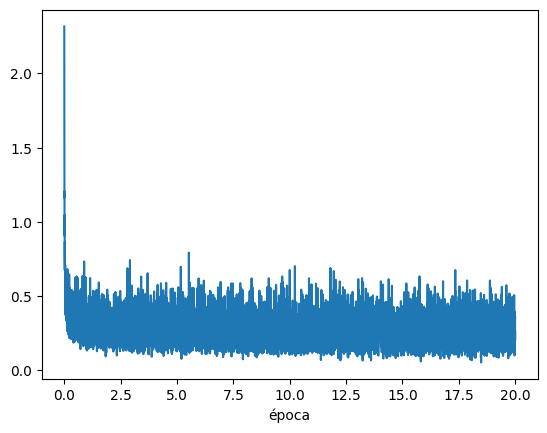

In [111]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

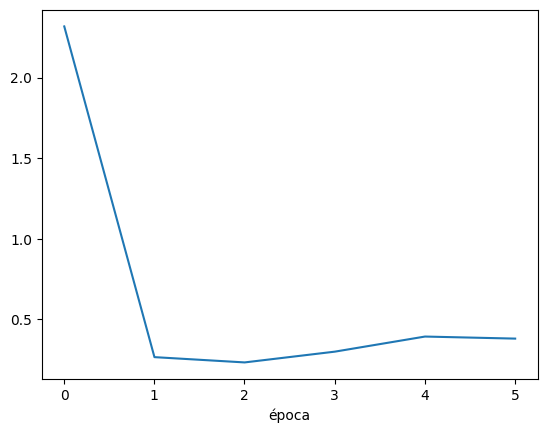

In [112]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? **(R. 100)**
2. Em uma época, quantos mini-batches existem? **(R. 600)**
3. Qual é a definição de época? **(R. 6)**

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [113]:
epochs = []
losses = []
accuracies = []

total_trained_samples = 0

for epoch in range(n_epochs):
    correct = 0
    total = 0

    for batch_idx, (x_train, y_train) in enumerate(loader_train):
        inputs = x_train.view(-1, 28 * 28)
        targets = y_train

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.item())

        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        accuracy = 100 * correct / total
        accuracies.append(accuracy)

        if (batch_idx + 1) % 100 == 0:
          print(f"Época: {epoch+1}/{n_epochs}, Batch: {batch_idx+1}, "
                f"Loss: {loss.item():.4f}, Acurácia: {accuracy:.2f}%")

    print(f"\n[Época {epoch+1}/{n_epochs}] "
          f"Acurácia média: {accuracy:.2f}%, perda média: {np.mean(losses):.4f}\n")


Época: 1/20, Batch: 100, Loss: 0.2081, Acurácia: 92.88%
Época: 1/20, Batch: 200, Loss: 0.2607, Acurácia: 92.81%
Época: 1/20, Batch: 300, Loss: 0.3797, Acurácia: 92.79%
Época: 1/20, Batch: 400, Loss: 0.1430, Acurácia: 92.88%
Época: 1/20, Batch: 500, Loss: 0.2750, Acurácia: 92.94%
Época: 1/20, Batch: 600, Loss: 0.2223, Acurácia: 92.91%

[Época 1/20] Acurácia média: 92.91%, perda média: 0.2549

Época: 2/20, Batch: 100, Loss: 0.2192, Acurácia: 93.37%
Época: 2/20, Batch: 200, Loss: 0.2606, Acurácia: 92.98%
Época: 2/20, Batch: 300, Loss: 0.3803, Acurácia: 92.92%
Época: 2/20, Batch: 400, Loss: 0.4150, Acurácia: 92.95%
Época: 2/20, Batch: 500, Loss: 0.2807, Acurácia: 92.96%
Época: 2/20, Batch: 600, Loss: 0.1859, Acurácia: 92.96%

[Época 2/20] Acurácia média: 92.96%, perda média: 0.2546

Época: 3/20, Batch: 100, Loss: 0.1990, Acurácia: 93.22%
Época: 3/20, Batch: 200, Loss: 0.1481, Acurácia: 93.19%
Época: 3/20, Batch: 300, Loss: 0.3081, Acurácia: 93.01%
Época: 3/20, Batch: 400, Loss: 0.2731, Acu

## Conclusões sobre os experimentos deste notebook


Na minha opinião, parece que ganho de 20 para 50 épocas foi bem sútil e demorou bastante. Acho que tivemos um bom número da redução da perda com 20 épocas.